In [ ]:
# install.packages('ggplot2')
# install.packages('ggforce')
# install.packages("tidyverse")
# install.packages("ggpmisc")
library(tidyverse)
library(ggplot2)
library(ggforce)
library(ggpmisc)
set.seed(88)

# Iteration: for/while Loops

Loops are a great way to accumulate results that are calculated in a repetitive fashion. Last week we covered the ```across``` and ```map``` family to perform repeated calculations over dataframes. But what if we want to work with simple vectors or we don't have a starting dataframe to work with?

We can leverage for and while loops to accomplish this! What's the difference between them?



In [ ]:
for (number in 1:25) {
    print(number ** 2)
}

[1] 1
[1] 4
[1] 9
[1] 16
[1] 25
[1] 36
[1] 49
[1] 64
[1] 81
[1] 100
[1] 121
[1] 144
[1] 169
[1] 196
[1] 225
[1] 256
[1] 289
[1] 324
[1] 361
[1] 400
[1] 441
[1] 484
[1] 529
[1] 576
[1] 625


In [ ]:
n = 1
while (n <= 25) {
  print(n ** 2)
  n = n + 1
}

[1] 1
[1] 4
[1] 9
[1] 16
[1] 25
[1] 36
[1] 49
[1] 64
[1] 81
[1] 100
[1] 121
[1] 144
[1] 169
[1] 196
[1] 225
[1] 256
[1] 289
[1] 324
[1] 361
[1] 400
[1] 441
[1] 484
[1] 529
[1] 576
[1] 625


Very often, you can write a for loop as a while loop and vice versa. The reason we distinguish between them is because they provide cleaner code for their designed use cases. While loops will continue to run as long as a conditional statement is satisfied. For loops will continue to run until they reach the end of a predetermined sequence. 

For example, let's assume we want to create a loop to see if a randomly sampled standard normal value is above 2 (being above 2 standard deviations is incredibly unlikely, around 2.5% accoring to the [empirical rule](https://statisticsbyjim.com/probability/empirical-rule/)). 

**Note**: This is a very dumb way to sample normal values since you can just sample many at a time by increasing the "n" argument in `rnorm`. This is simply for explanation purposes.

With a basic for loop, we can basically only specify how many times we want to iterate through something.

In [ ]:
for (i in 1:100) {
  normal_value <- rnorm(1)
  print(paste(normal_value, normal_value > 2))
}

[1] "-0.226255689536158 FALSE"
[1] "0.646569838387327 FALSE"
[1] "2.34605825219816 TRUE"
[1] "-1.84561871843916 FALSE"
[1] "0.459691054852836 FALSE"
[1] "0.123781050687574 FALSE"
[1] "0.133148665541915 FALSE"
[1] "-2.04077470124871 FALSE"
[1] "-1.26760891779546 FALSE"
[1] "0.667483892506979 FALSE"
[1] "-0.80148295142935 FALSE"
[1] "0.996486045575694 FALSE"
[1] "1.39342321534033 FALSE"
[1] "-0.229194292183583 FALSE"
[1] "0.170762674067546 FALSE"
[1] "-0.851785724133149 FALSE"
[1] "0.348912229568386 FALSE"
[1] "0.792323303417439 FALSE"
[1] "-0.149276870696005 FALSE"
[1] "0.921876641926451 FALSE"
[1] "0.252605352306988 FALSE"
[1] "-0.788929982058018 FALSE"
[1] "-0.745862589196893 FALSE"
[1] "-1.15578277961066 FALSE"
[1] "0.899402325853935 FALSE"
[1] "-0.851349493680508 FALSE"
[1] "-0.634605977070447 FALSE"
[1] "-1.42074172553961 FALSE"
[1] "-0.341760142325875 FALSE"
[1] "-0.849180215767598 FALSE"
[1] "-0.950861399353649 FALSE"
[1] "0.515413104997654 FALSE"
[1] "-0.558542812774902 FALSE"
[

But what if we wanted to stop the loop once we hit a value greater than 2? We could add a break statement to the for loop (which stops the loop execution early)...

In [ ]:
for (i in 1:100) {
  normal_value <- rnorm(1)
  print(paste(normal_value, normal_value > 2))
  if (normal_value >= 2) {
    break
  }
}

[1] "-1.10107683097836 FALSE"
[1] "-0.935481112718233 FALSE"
[1] "-0.23052941894314 FALSE"
[1] "-1.02842998672649 FALSE"
[1] "-0.741713373178959 FALSE"
[1] "0.475425643405208 FALSE"
[1] "-1.11765606646925 FALSE"
[1] "0.138876454523764 FALSE"
[1] "-0.553070606309914 FALSE"
[1] "1.06140535648126 FALSE"
[1] "-0.861064657733219 FALSE"
[1] "-1.44648565904492 FALSE"
[1] "0.0215201340440497 FALSE"
[1] "0.940098513437969 FALSE"
[1] "1.03389772158565 FALSE"
[1] "-0.478191941171844 FALSE"
[1] "0.0818590725028548 FALSE"
[1] "0.117775076076112 FALSE"
[1] "0.246130718885796 FALSE"
[1] "1.3588904063373 FALSE"
[1] "0.645890004162937 FALSE"
[1] "0.848761656692023 FALSE"
[1] "-0.0294952237794476 FALSE"
[1] "-0.313309939876009 FALSE"
[1] "0.463456910745184 FALSE"
[1] "-0.50601906141488 FALSE"
[1] "-0.310929026045548 FALSE"
[1] "1.59030751775292 FALSE"
[1] "0.707141489239953 FALSE"
[1] "1.23808558242036 FALSE"
[1] "-1.78115711188187 FALSE"
[1] "-1.65947509394998 FALSE"
[1] "-1.02356999978713 FALSE"
[1] "

However, a while loop accomplishes this more elegantly.

In [ ]:
value = 0
while (value <= 2) {
  value = rnorm(1)
  print(value)
}

[1] -0.4552686
[1] 0.3879814
[1] 2.391129


# MC Sampling (+ a review on functions)

Many times, we want to simulate an event happening to make an inference about it. To do this, we create the simulation and run it many times over and use summary metric to get estimates for a target value. An example of this is a commonly asked data science interview question. The question is this:

**Given a function that can randomly generate a random value from -1 to 1, generate 20000 values and estimate $\pi$.**

At first glance, this seems crazy! How can such a simple function give us an estimation for this seemingly unrelated value?

In [ ]:
# this function is creating a random value between -1 and 1
runif(n=1, min=-1, max=1) # n: number of samples  min: lower bound  max: upper bound

[1] 0.8014536

In [ ]:
# this will generate 200000 values
runif(20000, min=-1, max=1)

[1] -3.709054e-01 -3.868120e-01 -7.374681e-01  3.271247e-02 -1.845401e-01
    [6] -6.759550e-01 -6.939895e-01 -8.636116e-01  8.410270e-01  6.624593e-01
   [11] -5.199652e-01  2.045868e-01 -5.775721e-01 -8.926969e-02  4.300886e-01
   [16]  7.391526e-01  2.245536e-01 -3.196576e-01 -8.941102e-01 -5.395106e-01
   [21] -2.444718e-02 -6.743169e-01 -4.197988e-01 -8.589262e-01  6.865970e-01
   [26]  9.322791e-01  4.235804e-01  8.902164e-01 -4.555489e-01  3.647051e-01
   [31] -7.290645e-02  1.333314e-01  3.337571e-01  1.639379e-01 -5.423573e-01
   [36] -7.728227e-01  9.719839e-01  3.404088e-01 -4.154543e-01 -1.970489e-01
   [41] -9.484876e-01  9.113074e-01  8.308693e-01 -2.409580e-01  6.652362e-01
   [46]  4.429684e-01  6.933673e-02  9.733778e-01 -8.388863e-01  8.004903e-02
   [51]  8.619763e-01 -4.235737e-01  4.901255e-01 -8.148417e-01  4.417796e-01
   [56]  2.572253e-01  4.785951e-02  8.830738e-01 -8.662159e-01  8.868068e-01
   [61] -1.180385e-01 -4.881248e-01  1.630929e-01  4.204886e-01 -9.766296e-01
   [66]  6.478896e-01 -1.246677e-01 -2.606551e-02  4.749919e-01  5.875155e-02
   [71] -2.080885e-02  1.035717e-01 -8.818768e-01  3.168560e-01 -5.633736e-01
   [76]  2.975940e-01  2.552681e-01 -2.503929e-01  2.673721e-01 -7.638009e-01
   [81]  1.744582e-01  1.935119e-01  8.182798e-01  1.834148e-01 -8.969816e-01
   [86] -1.704846e-01  7.292828e-01 -1.211180e-01  7.303796e-02 -8.814959e-01
   [91] -9.824320e-02 -3.271947e-01 -6.470293e-01  8.517052e-01  3.557603e-01
   [96]  8.488826e-01 -3.921187e-01 -6.217956e-01 -8.620442e-02 -5.710756e-01
  [101]  7.169114e-01 -5.447568e-01 -8.786150e-01 -6.694048e-01  3.434871e-01
  [106] -8.116497e-01 -8.420813e-01 -5.008494e-01  2.619364e-01 -2.156850e-01
  [111]  5.570099e-01  1.131084e-01 -1.832605e-01 -3.298306e-01 -6.588028e-01
  [116] -6.647235e-01 -6.372288e-01  5.113589e-01 -5.477381e-01 -6.594631e-01
  [121] -5.225511e-01 -7.483944e-01 -2.671644e-01  2.352731e-01 -8.406240e-01
  [126] -2.402481e-01  8.063060e-01  5.461720e-01  8.125384e-01  6.350467e-01
  [131]  3.826391e-01  9.145294e-01 -7.675227e-01  3.243385e-01  4.979807e-01
  [136] -6.173649e-01  8.738172e-02  2.638608e-01 -5.858771e-01  3.632596e-01
  [141] -6.907015e-01  7.834797e-02  6.934010e-01  7.522224e-02 -9.980245e-01
  [146]  1.577286e-01 -1.441995e-01  1.958946e-01  2.643348e-02  7.556370e-01
  [151]  4.179827e-01  1.474042e-01 -3.301002e-01 -4.262391e-01  7.738507e-01
  [156]  5.279601e-01 -1.386111e-01  2.151648e-01 -9.689842e-01  2.885377e-01
  [161]  5.808645e-02  7.753307e-01  1.229433e-01 -2.696438e-01  8.152973e-01
  [166] -6.687436e-01 -3.711147e-01 -8.860696e-01  4.579870e-01  1.126084e-02
  [171]  8.500822e-01 -5.797494e-01  2.973207e-01 -7.250342e-01  5.550687e-01
  [176]  5.376126e-01  8.875048e-01 -8.978199e-01  8.303756e-01 -1.294403e-01
  [181]  6.429010e-01  3.986404e-01 -8.292984e-01  8.929003e-01  6.348572e-01
  [186]  7.058747e-01 -4.877963e-01 -9.051480e-02  8.918099e-01 -8.606069e-01
  [191]  8.306210e-01 -2.942312e-02 -4.078778e-01 -5.281842e-01 -8.853948e-01
  [196]  7.271584e-01  9.740229e-01  9.960335e-01  5.480649e-01  1.699033e-01
  [201] -6.196780e-01 -8.176563e-01 -5.067780e-02  3.313121e-01 -8.433572e-01
  [206] -5.501545e-01  6.224233e-01 -9.033259e-01  3.233695e-01  5.929442e-01
  [211] -3.063732e-01 -7.564056e-01 -3.491208e-01 -2.861300e-01 -2.438616e-01
  [216]  9.071775e-01 -7.880243e-01  1.608812e-01 -7.383789e-01  5.901117e-01
  [221] -4.802792e-01 -4.445821e-01 -2.464989e-01 -6.032557e-01 -4.293303e-01
  [226]  1.537690e-01 -6.066758e-01  3.433601e-01 -6.621873e-01  2.109799e-01
  [231]  4.639037e-01  8.012864e-01  3.107400e-01 -3.901921e-01 -6.130551e-01
  [236]  8.028243e-01  5.550176e-01 -9.047912e-01 -3.476064e-02  5.542234e-01
  [241]  2.442517e-01  2.920872e-01  8.367680e-01  8.274425e-01 -1.480034e-02
  [246] -8.091255e-01  5.909464e-01 -2.635001e-02  4.479158e-01 -8.400344e-01
  [251]  9.763119e-03 -8.935191e-01 -1.154026e-01 -2.373962e-02  3.372644e-01
  [256] -7.842078e-01 -5.7

The above code builds up how we can generate 20000 uniform random values between -1 and 1. 

So what's the answer to the question? The first thing you might realize is that $\pi$ is related to circles!. We know that the area of a circle is $\pi * r^2$ Well what happens when $r = 1$? We get $\pi$! But circles are 2 dimensional, so we need to find a way to oragnize 20000 values into 2 dimension. The following is the elegant solution:

In [ ]:
points <- data.frame(x=runif(20000, min=-1, max=1), y=runif(20000, min=-1, max=1))

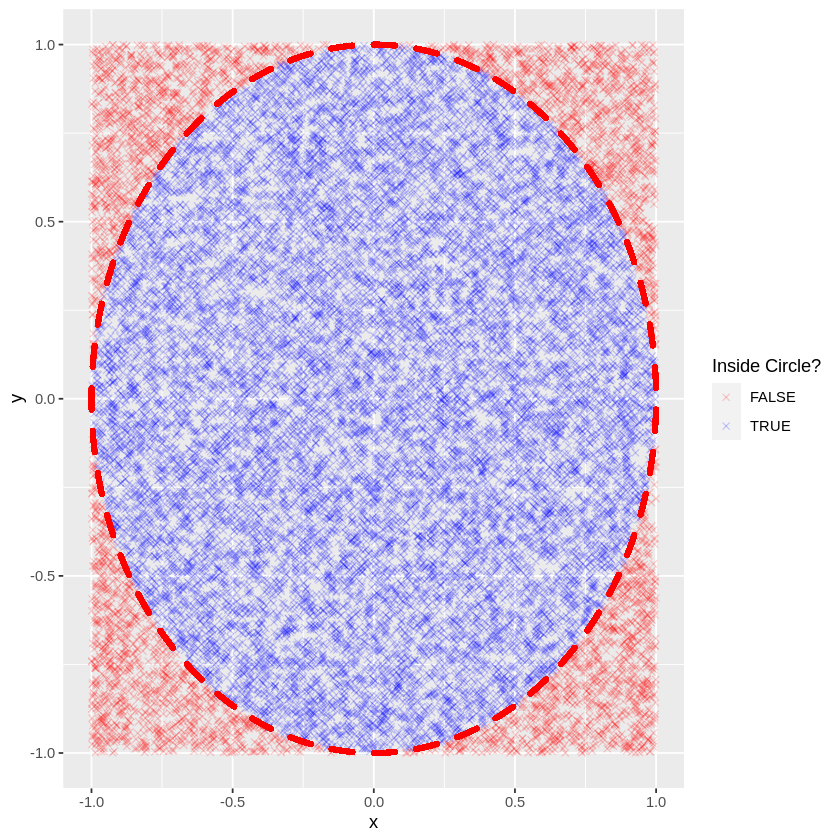

In [ ]:
ggplot(data=points, aes(x, y, col = (x^2 + y^2 <= 1))) + 
  geom_point(shape=4, alpha=0.2) + scale_colour_manual(name = 'Inside Circle?', values = setNames(c('blue','red'),c(T, F))) +
    geom_circle(aes(x0=0, y0=0, r=1), linetype='dashed', color='red', alpha=0.1, lwd=1.5, inherit.aes=FALSE)

In [ ]:
points %>% summarize(pi_value=4 * mean(x^2 + y^2 <=1))

pi_value
<dbl>
3.1396


Notice what happened! We took a circle with an area of $\pi$ and calculated the proportion of points that fell inside the circle! Because the area of the square is 4, we were able to multiply this proportion that was an estimate using 10000 points by 4 to get our final answer!

If we wanted to estimate pi in a function, we could throw this solution in a function for easy use! This makes running the Monte-Carlo sampling experiment insanely simple!

In [ ]:
estimate_pi <- function(num_points=10000) {
  points <- data.frame(x=runif(num_points, min=-1, max=1), y=runif(num_points, min=-1, max=1))
  pi_estimate <- points %>% summarize(pi_value=4 * mean(x^2 + y^2 <=1))
  return(pi_estimate[1,1]) # the [1,1] just tells R to collect the first value from the first column (which is the only one in our case)
}

In [ ]:
estimate_pi()

[1] 3.1358

And now that we have a function that can estimate pi, why not take multiple estimates over and over again and use summary metrics to build some confidence in our estimate?

In [ ]:
estimate_pi_MC <- function(num_points=10000, num_repetitions=100) {
  pi_estimates = c()
  for (repition in 1:num_repetitions) {
    pi_estimates = c(pi_estimates, estimate_pi())
  }
  return(pi_estimates)
}

In [ ]:
summary(estimate_pi_MC())

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.115   3.132   3.140   3.141   3.150   3.169 

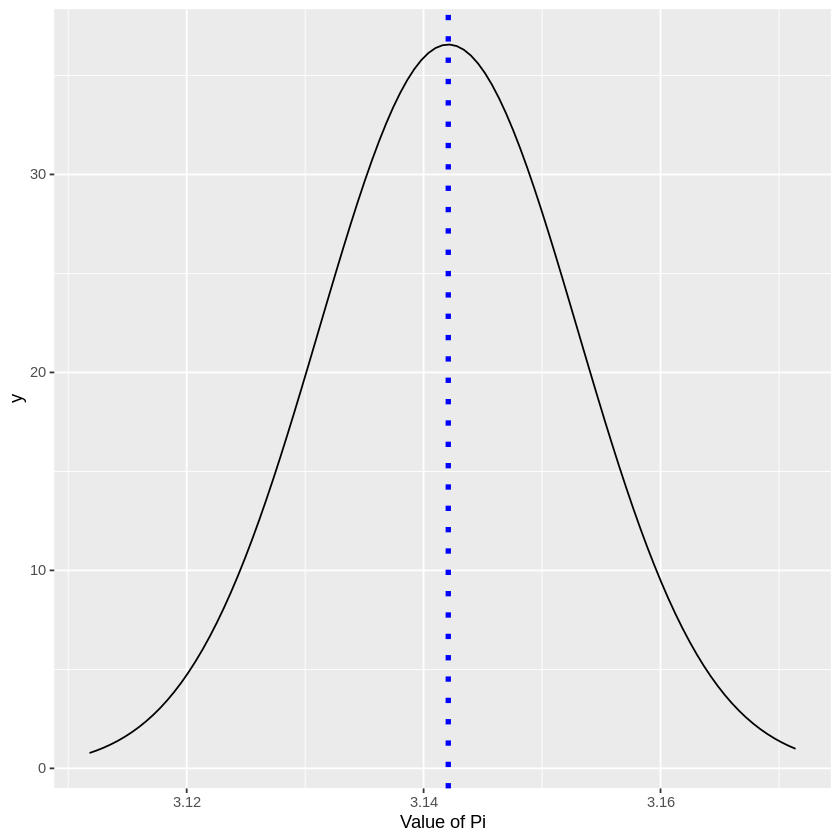

In [ ]:
pi_estimates_df <- data.frame(pi_estimates = estimate_pi_MC())

ggplot(pi_estimates_df, aes(x=pi_estimates)) + 
  stat_function(
    fun = dnorm,
    args = with(pi_estimates_df, c(mean = mean(pi_estimates), sd = sd(pi_estimates)))
  ) +
    scale_x_continuous("Value of Pi") + 
      geom_vline(xintercept = mean(pi_estimates_df$pi_estimates), linetype="dotted", color = "blue", size=1.5)

# Linear Regression

In this section, we dive into the ability to relate variables in a linear fashion with linear regression.

### Simple Linear Regression

"Simple" linear regression simply refers to the case where we have one explanatory variable, and one dependent variable, for which we want to assess the linear relationship between.

Simple linear regression is predicated on the assumption that the **true** relationship between x (our explanatory variable) and y (dependent variable) is 

$$y_i = \beta_0 + \beta_1 * x_i + \epsilon_i$$

where



*   $y_i$: the i-th observation of the response variable
*   $\beta_0$: the TRUE intercept value of the underlying linear relationship
*   $\beta_1$: the TRUE slope value of the underlying linear relationship
*   $x_i$: the i-th observation of the explanatory variable
*   $\epsilon_i$: the i-th noise value






The idea behind this model is we assume that the underlying expected relationship between x and y is linear (as we will see more theoretically when we look at the Ordinary Least Squares (OLS) assumptions). For now, it suffices to understand that a linear regression is learning the best fit line that describe the data. In mathematical terms, a linear regression learns the relationship

$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$$

A linear regression tries to predict y (which is we use $\hat{y}$ to signify this a prediction and not the truth) with learned regression parameters ($\hat{\beta_0}$, $\hat{\beta_1}$) using the explanatory variable $x$.

For example, using the mtcars dataset, let's see if we can predict how long it takes a car to travel a quarter of a mile from its horsepower. It seems pretty reasonable to assume that the more horsePOWER a car has, the faster it can go right?

In [ ]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


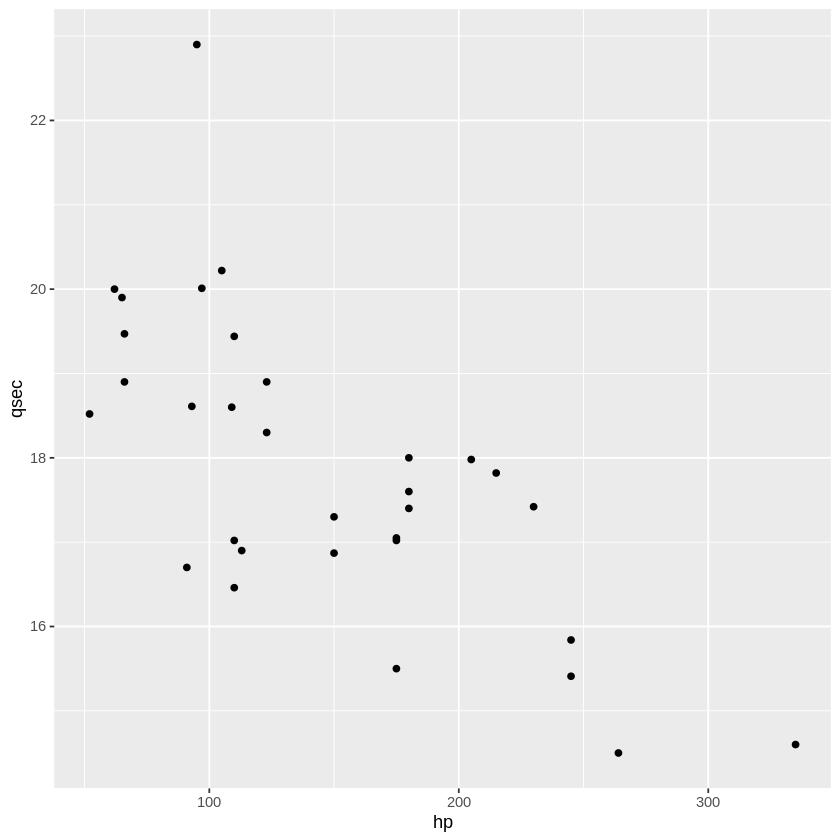

In [ ]:
ggplot(data=mtcars, aes(x=hp, y=qsec)) + geom_point()

Our hunch is correct! There seems to be an inverse relationship between horsepower (hp) and the time it takes for a car to traver a quarter mile (qsec).

We can assess the relationship using the `lm` function which is short for "linear model" and access key insights by calling the summary function with our linear model variable as the argument.

In [ ]:
qsec_from_hp <- lm(qsec ~ hp, data=mtcars)

In [ ]:
summary(qsec_from_hp)


Call:
lm(formula = qsec ~ hp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1766 -0.6975  0.0348  0.6520  4.0972 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.556354   0.542424  37.897  < 2e-16 ***
hp          -0.018458   0.003359  -5.495 5.77e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.282 on 30 degrees of freedom
Multiple R-squared:  0.5016,	Adjusted R-squared:  0.485 
F-statistic: 30.19 on 1 and 30 DF,  p-value: 5.766e-06


What do these values mean? Linear regression tries to estimate best coefficients for the line, but because error exists, it comes with uncertainty. The "Estimate" provides you with the point estimate for the regression values. This can be in layman's terms interpreted as the value you would choose for the slope and intercept if you could only choose 1 value as your prediction.

However, as statisticians we want to quantify the uncertainty of these estimates and that's what the "Std. Error" gives us. With these 2 quantities, we can calulate a t-score and the associated p-value that comes with it. The lower the p-value, the less likely this result occured by random chance. Because the hypothesis test being assessed is

$$H_0: \beta_1 = 0 \textrm{ vs. } \beta_1 \neq 0 $$

if there's any slight help from x to predict y, the model will say "Oh wow! That was helpful." It also provides you a p-value to provide the statistical signficance of the result.





This seems almost too simple right? A few recognizable lines of code and BOOM. We have our insight. However, unlike previous labs where the challenge was the programming obstacles you had to jump through, here the challenge is more involved with the metrics displayed and how we make inferences from the model.

Is the relationship valid? How do I trust this result? Is this the right model to be running? Linear regression (and really all models) have to deal with these cosmic questions in order to make the inference useful and trustworthy for future predictions. We'll address these questions when we talk about the OLS assumptions.

### Multiple Linear Regression

Multiple linear regression is a linear regression that has several explanatory varibles.

$$ y_i = \beta_0 + \sum_{j=1}^{p} \beta_j * x_{ij} + \epsilon_i$$

The complications that can arise with multiple linear regression that can arise will be discussed in the next segment, but running a multiple linear regression is truly as simple as running the simple case. You identify your response and your predictors and use the same `lm`, `summary` combo you would expect.

Suppose you want to predict the qsec, but instead of only using hp, we also think that the number of cylinders (cyl), the weight (wt), and the number of forward gears (gear) are useful indicators of how quickly a car can move.

In [ ]:
nuanced_qsec_model <- lm(data=mtcars, qsec ~ hp + cyl + wt + gear)

In [ ]:
summary(nuanced_qsec_model)


Call:
lm(formula = qsec ~ hp + cyl + wt + gear, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3573 -0.5537 -0.1712  0.4668  2.9252 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.092953   2.097136  11.965 2.65e-12 ***
hp          -0.009353   0.005528  -1.692 0.102191    
cyl         -0.915657   0.232959  -3.931 0.000532 ***
wt           1.008693   0.298983   3.374 0.002256 ** 
gear        -0.936104   0.351266  -2.665 0.012836 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8962 on 27 degrees of freedom
Multiple R-squared:  0.7809,	Adjusted R-squared:  0.7485 
F-statistic: 24.06 on 4 and 27 DF,  p-value: 1.447e-08


Notice how including more variables in our analysis actually changed our conclusion. Horsepower no longer seems to be a super useful predictor of the qsec. 

This happens because in the simple linear regression case, the only predictor that the model is allowed to use is the horsepower, and without horsepower, all you have is an intercept which is a horizontal line. So, of course the simple case will spit out that horsepower is useful. However, the multiple regression model provides us with a more nuanced inference. The model basically starts to say "you know, hp is helpful if that's all I have to work with, but having access to cyl, wt, and gear I actually don't need hp anymore and it doesn't help nearly as much."

### OLS Assumptions

While linear regression is incredibly simple to use, it requires more nuance to paint the full picture. There are some fundamental questions we need to ask ourselves when trying to apply linear regression.

Here we will list out the assumptions 1 by 1 and explain why they are fundamental to getting interpretable results from a linear regression model. We'll do so by violating these assumptions and try to destroy linear regression.

<br>

---

1. **The relationship between the X and Y variables must be linear.**

---

<br>


... no duh. But there's actually more to it. Imagine trying to run a linear regression on the following dataframe.

`geom_smooth()` using formula = 'y ~ x'


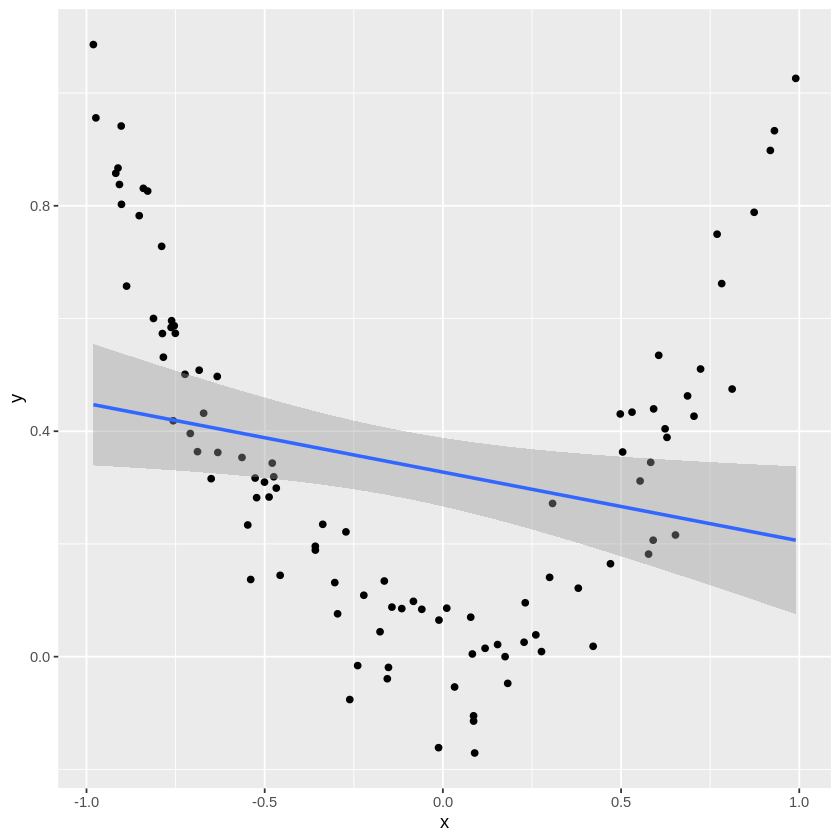

In [ ]:
x=runif(100,-1,1)
y = x^2 + rnorm(100, 0, 0.1)
df <- data.frame(x,y)
ggplot(df,aes(x, y)) +
  geom_point() +
  geom_smooth(method='lm')

This is not a very smart model. Clearly I coded the data generating process to give x and y a quadratic relationship. This model has no predictive structure to it. However...

`geom_smooth()` using formula = 'y ~ x'


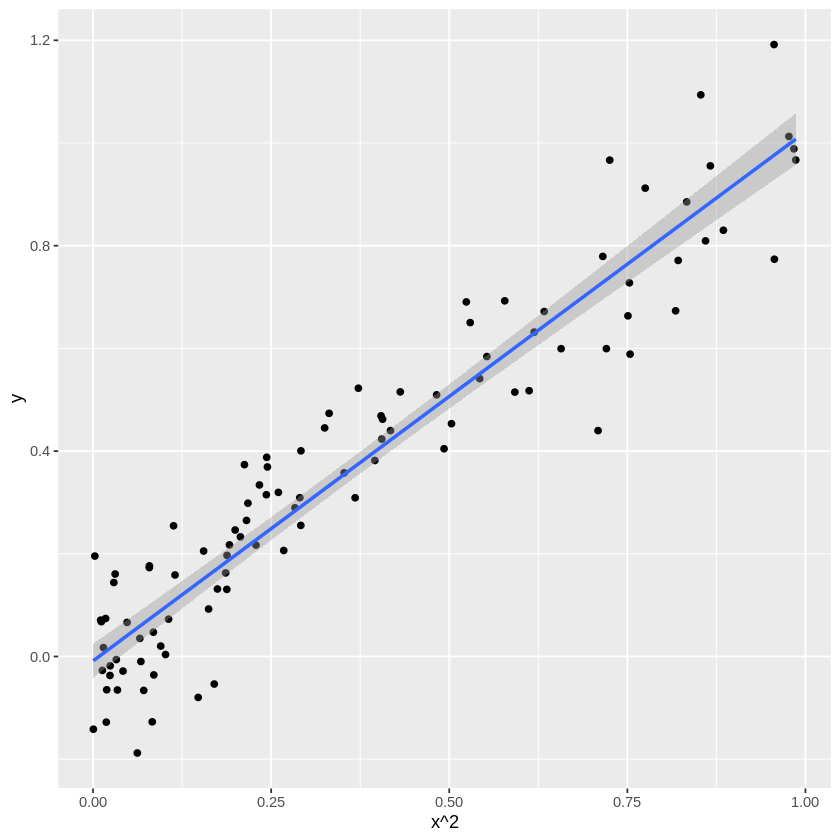

In [ ]:
x=runif(100,-1,1)
y = x^2 + rnorm(100, 0, 0.1)
df <- data.frame(x^2,y) # NOTICE THE DIFFERENCE HERE?
ggplot(df,aes(x^2, y)) +
  geom_point() +
  geom_smooth(method='lm')

When we provide a variable for x that really does have a linear relationship with y, our model actually makes sense of the data quite well.

 

---


  2. **Observations are randomly sampled.**



---

<br>

Consider what happens if we filter out data points we don't want and don't let points be random.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


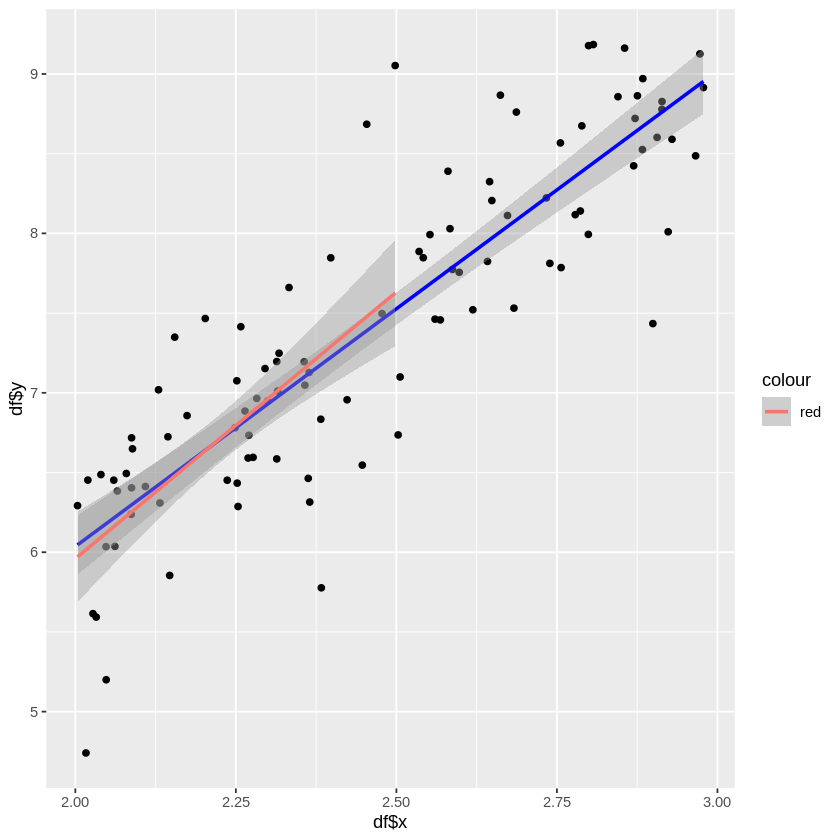

In [ ]:
x <- runif(100, 2, 3)
y <- 3 * x + rnorm(100, 0, 0.5)
df <- data.frame(x,y) 
with_filter_df <- df %>% filter(x <= 2.5)
ggplot() +
  geom_point(aes(df$x, df$y)) +
  geom_smooth(aes(df$x, df$y), method='lm', col='blue') +
  geom_smooth(aes(with_filter_df$x, with_filter_df$y, col='red'), method="lm")

Notice that the red line is created from random observations. We did originally sample everything independently, but then only used observations lower than 2.5. This decision to filter isn't done at random and can result in a regression line that isn't representative of your true data. A common malpractice for data analysis is running an analysis based off of a convenience sample (aka analyzing data that's easy or desirable to get).

 
<br>

---


 
  3. **The condtional mean of errors is 0: $E(ϵ|x) = 0$.**

---

<br>

This is an incredibly important assumption because it assumes we have all the relevant data available to us. 

Let's take the example where you and I are all powerful and we know that 

$y = 0.1 * x_1 - 2*x_2 + ϵ$, where $ϵ \sim N(0,10)$.

However, what if we don't have access to $x_2$? So the best we can do is run a linear regression on $x_1$ and $y$. Below is an example where I generate data such that $x_1 \sim N(100, 5)$ and $x_2 \sim N(50, 5)$.





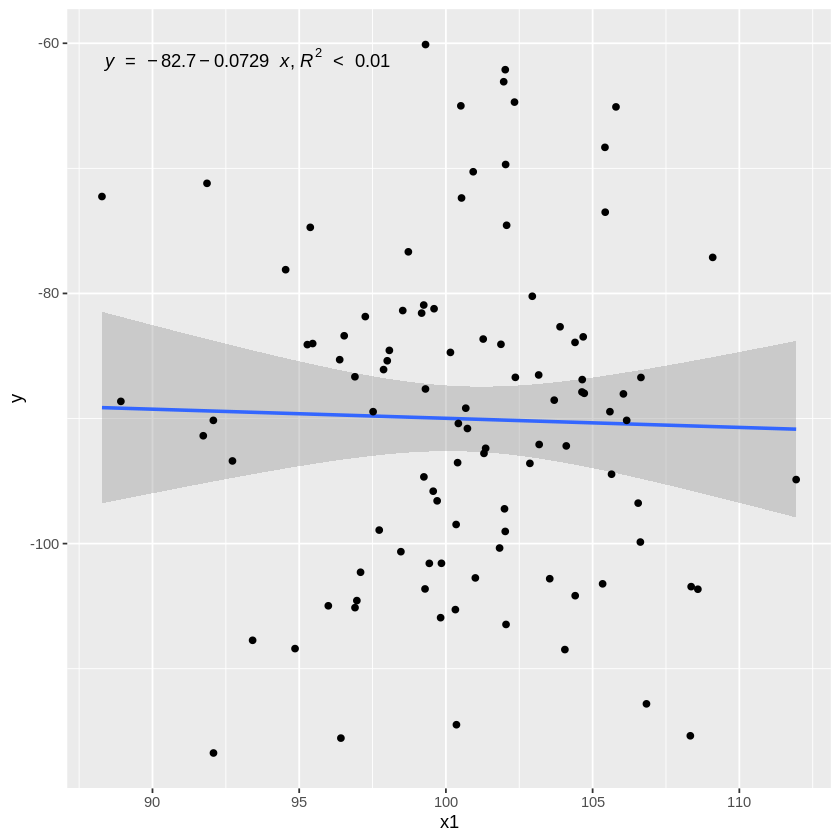

In [ ]:
x1 <- rnorm(100, 100, 5)
x2 <- rnorm(100, 50, 5)
eps <- rnorm(100, 0, 10)
y <- 0.1* x1 - 2 * x2 + eps
df <- data.frame(x1, x2, y)
ggplot(data = df, aes(x = x1, y = y)) +
  stat_poly_line() +
  stat_poly_eq(aes(label = paste(after_stat(eq.label),
                                 after_stat(rr.label), sep = "*\", \"*"))) +
  geom_point()

Holy cow this is abysmal. Despite us knowing that there is a very clear linear structure to the data, our coefficient for $x_1$ is not really accurate and the plot seems to indicate the data is all over the place. Rerunning this code over and over again will create different results every time and this analysis is flawed overall. Our error term contains relevant information which isn't random! This is called **omitted variable bias**.

  

---


  
  4. **There is no multicollinearity.**



---
<br>

This assumption helps us ensure that the interpretation of the model is accurate. When we interpret the results of the regression, we can interpret every slope coefficient as the change in the response given a unit increase in the explanatory variable holding everything else constant.

So for example, revisiting the mtcars example,


In [ ]:
nuanced_qsec_model <- lm(data=mtcars, qsec ~ hp + cyl + wt + gear)
summary(nuanced_qsec_model)


Call:
lm(formula = qsec ~ hp + cyl + wt + gear, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3573 -0.5537 -0.1712  0.4668  2.9252 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.092953   2.097136  11.965 2.65e-12 ***
hp          -0.009353   0.005528  -1.692 0.102191    
cyl         -0.915657   0.232959  -3.931 0.000532 ***
wt           1.008693   0.298983   3.374 0.002256 ** 
gear        -0.936104   0.351266  -2.665 0.012836 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8962 on 27 degrees of freedom
Multiple R-squared:  0.7809,	Adjusted R-squared:  0.7485 
F-statistic: 24.06 on 4 and 27 DF,  p-value: 1.447e-08


we can interpret this model as saying that increasing the number of cylinders by 1 decreases the qsec time by aprroximately -0.916 seconds when holding the weight, number of gears, and horsepower constant. In this case it's reasonable we could construct a car like this. But take the following example.

Suppose that in this imaginary world, we have the following weather phenomenon during the month of January.


> Temperature (F): $T \sim Unif(-10,40)$<br>
> Snowfall (in): $S \sim N(\frac{40-T}{5}, 0.05)$<br>
> Accidents: $A \sim N(S, 1)$


In [ ]:
temp = runif(100, -10, 40)
accidents_df <- data.frame(temp)
accidents_df <- accidents_df %>%
  mutate(snowfall=rnorm(100, (40-temp)/5, 0.05)) %>%
  mutate(accidents=rnorm(100, snowfall, 1))

In [ ]:
head(accidents_df)

,temp,snowfall,accidents
,<dbl>,<dbl>,<dbl>
1,-0.3830824,8.045910,7.881800
2,30.5287209,1.918008,2.335877
3,33.9488432,1.300653,1.730015
4,-6.0629076,9.132640,8.645352
5,0.4088449,7.883840,6.479667
6,-6.0603488,9.190416,8.580268


So in this imaginary world, the number of accidents is a normal distribution that's around the number of inches of snow we get. The amount of snow we get depends on how cold it is. However, clearly temperature and snowfall are correlated! The colder it gets, the more snow we're likely to have! 

In [ ]:
colinear_model <- lm(data=accidents_df, accidents ~ snowfall + temp)
summary(colinear_model)


Call:
lm(formula = accidents ~ snowfall + temp, data = accidents_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2562 -0.6776  0.1266  0.7852  1.7683 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -16.6133    16.7645  -0.991    0.324
snowfall      3.0644     2.0952   1.463    0.147
temp          0.4227     0.4190   1.009    0.316

Residual standard error: 0.9745 on 97 degrees of freedom
Multiple R-squared:  0.9102,	Adjusted R-squared:  0.9083 
F-statistic: 491.5 on 2 and 97 DF,  p-value: < 2.2e-16


Notice that our interpretation starts to become difficult to interpret. The slope for temp seems to imply that change happens while keeping the amount of snowfall constant. But is that reasonable to assume that it's possible? A temperature increase should lead to a decrease in snowfall. This is the problem of correlated features. I encourage you to try and run the above regression model multiple times to see why this is problematic. What do you notice?



---

  5. **Errors are homoscedastic: $Var(ϵ|x) = \sigma^2$.**


---



This assumption assumes that all data points have the same variance in their errors. Without this assumption, certain points could get the ability to influence the model more than others. Consider the following situation.

`geom_smooth()` using formula = 'y ~ x'


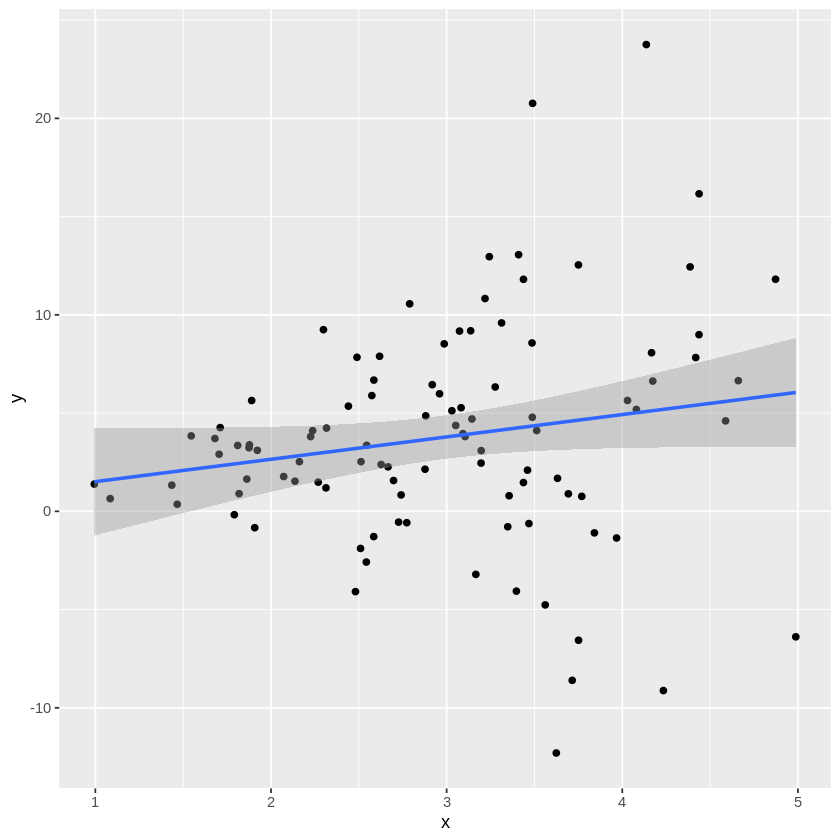

In [ ]:
x <- rnorm(100, 3, 1)
y <- x + rnorm(100, 0, x^2/2)
df <- data.frame(x, y)
ggplot(data=df, aes(x,y)) +
  geom_point() + 
  geom_smooth(method="lm")

You and I can see that I generated this model with an underlying linear relationship, but clearly the further away we get from 0, the wider our errors become. These wide errors add a LOT to our total error and influence the final shape of the line a lot. We want all of our points to be equally influential so that the model summarizes the data and not the other way around.

# OLS Assumptions: A Summary

In short, the 5 OLS assumptions are:

1. Linearity in Parameters
2. Observation are Random
3. $E(\epsilon|x) = 0$
4. No Collinearity
5. $Var(\epsilon|x) = \sigma^2)$

With these assumptions met, we can be rest assured that our model will perform decently for predictive inferences. Even if they aren't perfectly met, the closer we can get to following these assumptions, the better linear regression will perform.

### Correlation (and a hint for the hw 😉)

One way to assess if 2 variables are correlated is via the correlation coefficient. The correlation coefficient formula is defined as follows:

$$ r_{xy} = \frac{\sum_{i}(x_i-\bar{x})(y_i-\bar{y})}{\sigma_x \sigma_y} $$

A theoretical result that we will leave as a reading exercise is [that the multiple R^2 coefficient in regression analysis is actually the square of the correlation coefficient](https://www.youtube.com/watch?v=_pw6SDHOvkA). For now, suffice it to say that we can calculate the correlation coefficient using the `cor` function or by taking the square root of the multiple $R^2$ coefficient of a linear regression but getting the sign of the value from the simple linear regression coefficient.

This is important because if the $R^2$ value is 0.25, both r=0.5 and r=-0.5 would yield the same $R^2$ value.

In [ ]:
cor(mtcars$hp, mtcars$qsec)

[1] -0.7082234

In [ ]:
r2 <- summary(qsec_from_hp)$r.squared
# remove names
names(qsec_from_hp$coefficients) <- NULL
coefficient <- qsec_from_hp$coefficients[2]
sqrt(r2) * sign(coefficient)

[1] -0.7082234